In [1]:
import pandas as pd
import oenotebook as oenb
from openeye import oechem, oeiupac

In [2]:
df = pd.read_csv('activity_coefficients.csv',sep=';')

In [3]:
# Organize solutes and solvents for representation
# select data
solu = df['SMILES_0']
solv = df['SMILES_1']

# Remove duplicates
slim = []
for elem in solu:
    if elem not in slim:
        slim.append(elem)

trim = []
for elem in solv:
    if elem not in trim:
        trim.append(elem)
        
smiles1 = []
for elem in slim:
    mol = oechem.OEMol()
    oechem.OEParseSmiles(mol, elem)
    oechem.OEAssignAromaticFlags(mol, oechem.OEAroModelOpenEye)
    oechem.OEAddExplicitHydrogens(mol)
    oechem.OETriposAtomNames(mol)
    name = oeiupac.OECreateIUPACName(mol)
    mol.SetTitle(name)
    smiles1.append(mol)
    
smiles1 = pd.DataFrame(smiles1)
smiles1.columns = ['Molecule']

smiles2 = []
for elem in trim:
    mol = oechem.OEMol()
    oechem.OEParseSmiles(mol, elem)
    oechem.OEAssignAromaticFlags(mol, oechem.OEAroModelOpenEye)
    oechem.OEAddExplicitHydrogens(mol)
    oechem.OETriposAtomNames(mol)
    name = oeiupac.OECreateIUPACName(mol)
    mol.SetTitle(name)
    smiles2.append(mol)
    
smiles2 = pd.DataFrame(smiles2)
smiles2.columns = ['Molecule']

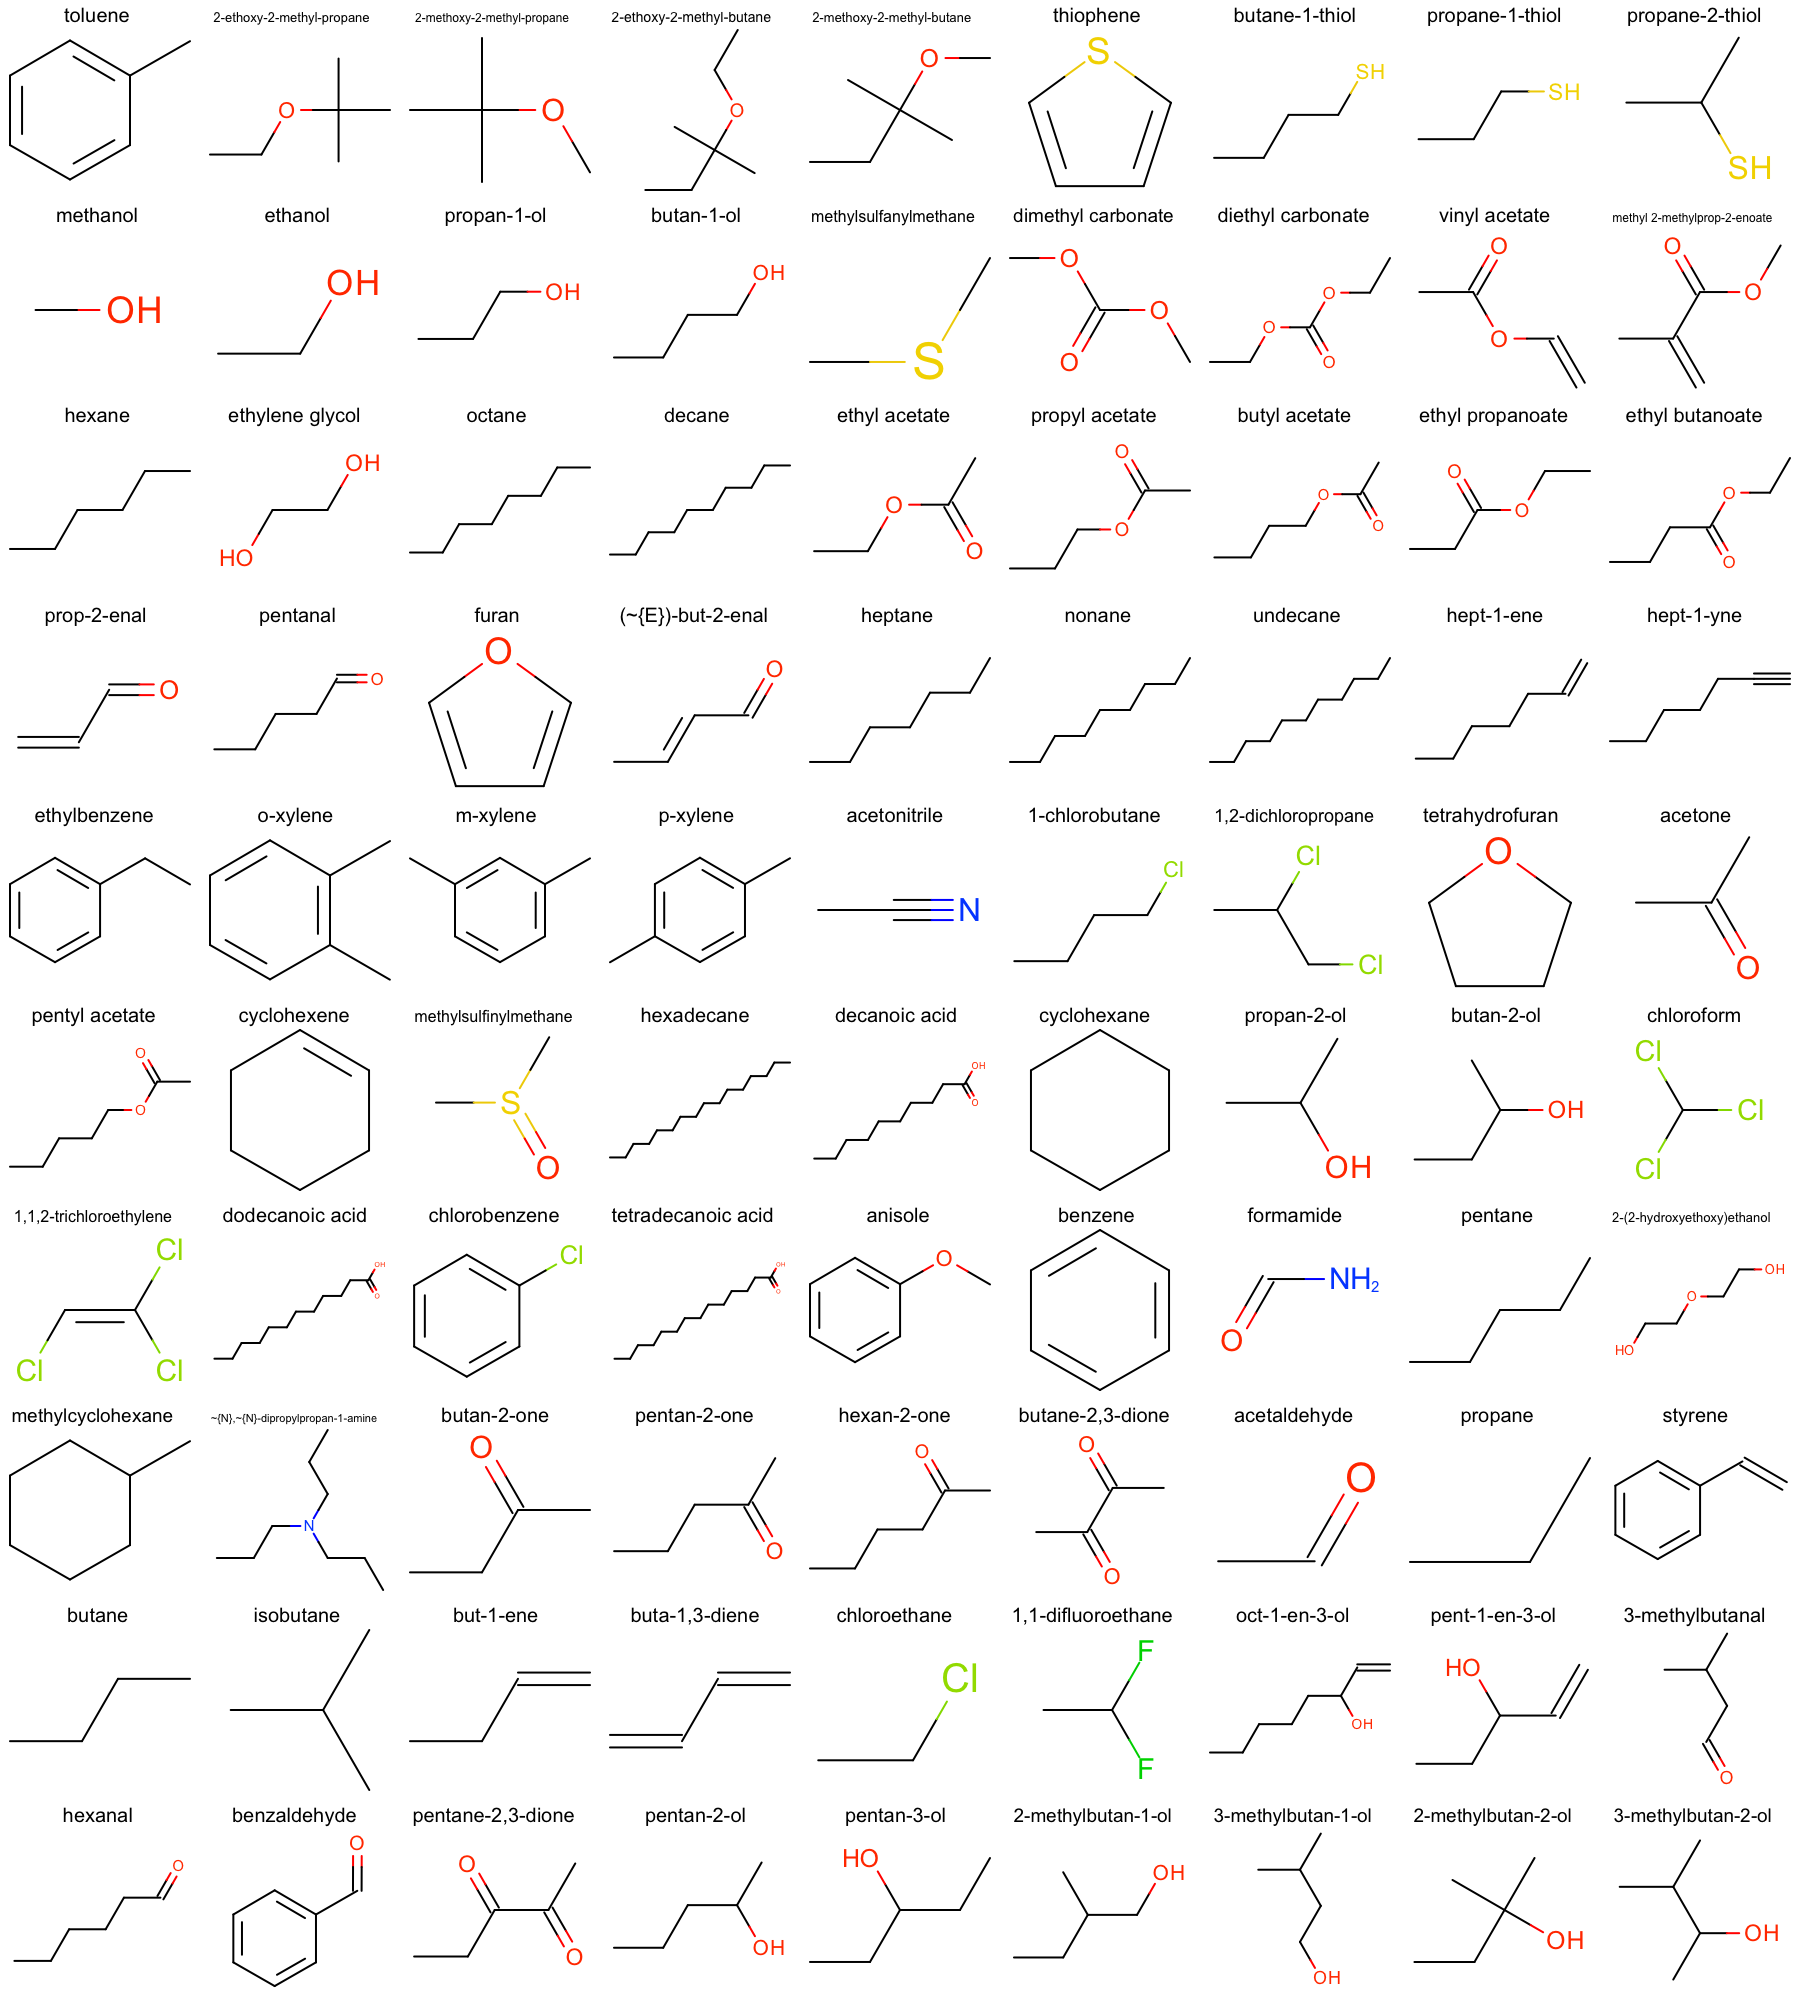

In [4]:
# Solutes
oenb.draw_mol_grid(smiles1, cols=9, rows=10)

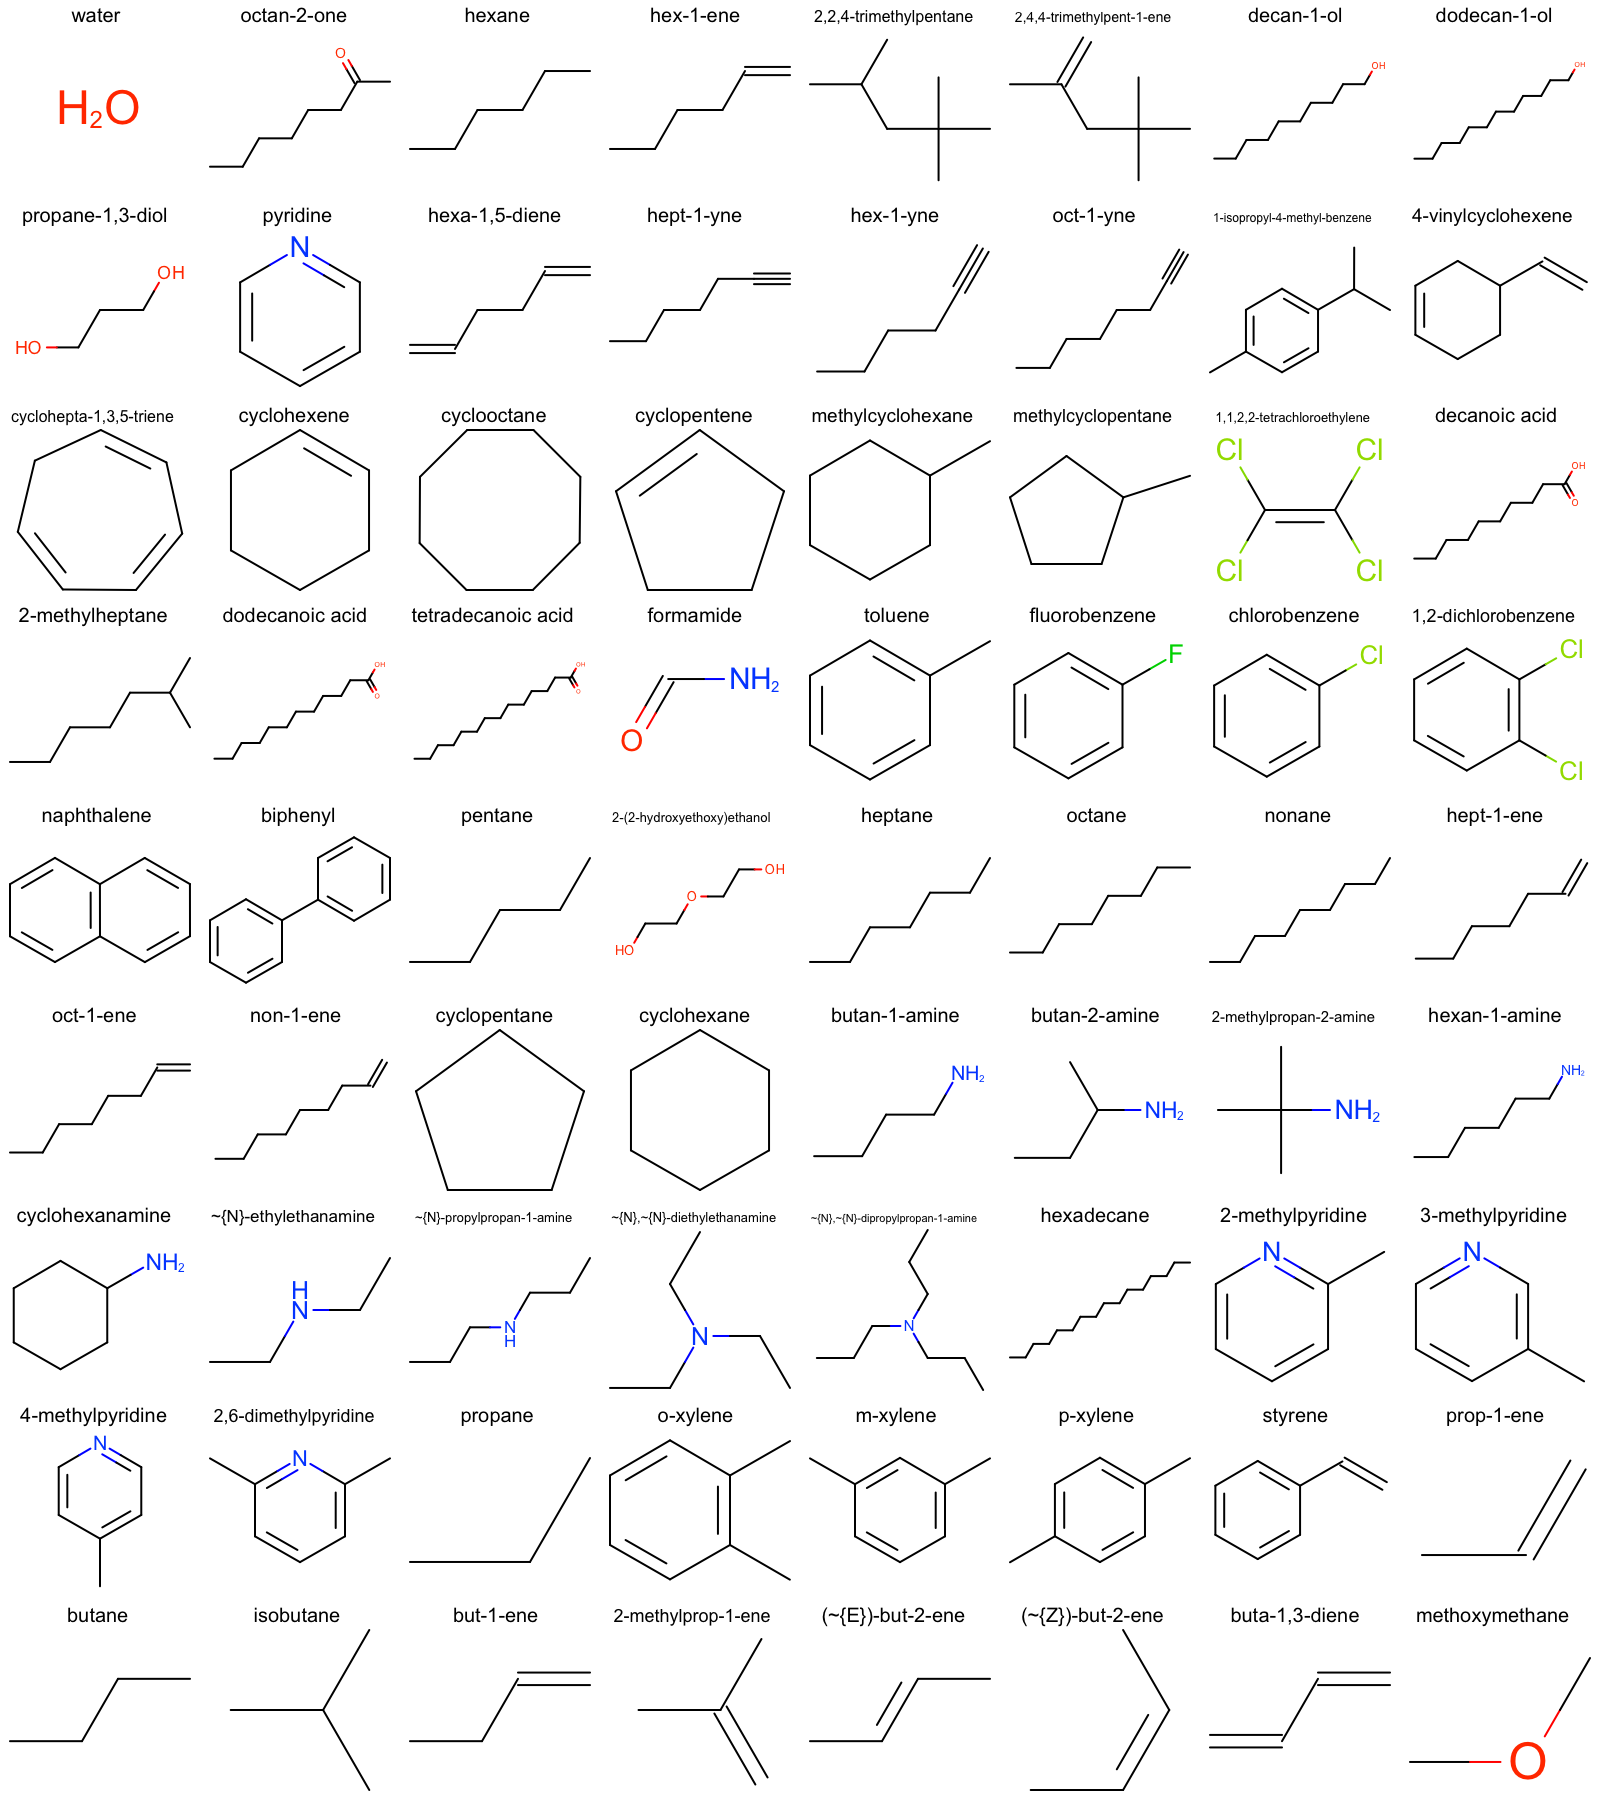

In [5]:
# Solvents (there are some repetitions)
oenb.draw_mol_grid(smiles2, cols=8, rows=9)

#### How many relative activities do I have?

In [ ]:
# # Columns' reference
# df.columns

In [ ]:
# # Data prep below:
# # Separate pairs associated to each coefficient value
# pairs = []
# for i in range(len(df)):
#     pair = [df.iloc[i]["component_0"],df.iloc[i]["component_1"]]
#     pairs.append(pair)
    
# # # Create dictionary whose entries contain the associated solvents
# relatives = {}
# for pair in pairs:
#     if pair[0] not in relatives.keys():
#         relatives[pair[0]] = []
#         relatives[pair[0]].append(pair[1])
#     if pair[0] in relatives.keys():
#         if pair[1] not in relatives[pair[0]]:
#             relatives[pair[0]].append(pair[1])
#         else: continue

# # Create list whose elements are themselves lists 
# # with a solute entry and the multiple solvents.
# study_example = []
# for elem in relatives.keys():
#     if len(relatives[elem]) > 1:
#         study_example.append([elem, relatives[elem]])
#     else: continue

# # Define total number of relative activities I can get
# rel_activities = []
# for elem in study_example:
#     rel_activities.append(len(elem[1])-1)

# # Create pair list (total number of simulations equals to length)
# pairlist = []
# for elem in study_example:
#     for mol in elem[1]:
#         pairlist.append([elem[0],mol])

In [ ]:
# from numpy import sum
# # Print overall info regarding the system
# print("Solute: #rel. activity coeffs.")
# for idx, elem in enumerate(rel_activities):
#     print("{}: {}".format(study_example[idx][0], elem))
# print("Total number of solvation free energies to be run, in principle: {}".format(len(pairlist)))
# print("Total number of relative activity coefficients, in principle: {}".format(sum(rel_activities)))

In [14]:
#Data prep below:
#Separate pairs associated to each coefficient value
# pairs = []
# for i in range(len(df)):
#    pair = [df.iloc[i]["component_0"],df.iloc[i]["component_1"],
#            df.iloc[i]['Activity coefficient'],df.iloc[i]['Activity coefficient_std'],
#            df.iloc[i]['Temperature, K'],df.iloc[i]['Pressure, kPa']]
#    pairs.append(pair)

dat = df[["component_0",'SMILES_0',"component_1",'SMILES_1','Activity coefficient','Activity coefficient_std','Temperature, K','Pressure, kPa']]


In [15]:
dat.head()

,component_0,SMILES_0,component_1,SMILES_1,Activity coefficient,Activity coefficient_std,"Temperature, K","Pressure, kPa"
0,toluene,Cc1ccccc1,water,O,8976.0,448.8,288.15,101.0
1,tert-butyl ethyl ether,CCOC(C)(C)C,water,O,325.0,9.0,288.15,101.0
2,methyl tert-butyl ether,COC(C)(C)C,water,O,127.0,6.0,288.15,101.0
3,"butane, 2-ethoxy-2-methyl-",CCOC(C)(C)CC,water,O,1351.0,44.0,288.15,101.0
4,tert-amyl methyl ether,CCC(C)(C)OC,water,O,390.0,18.0,288.15,101.0


In [16]:
dat.to_pickle('activity_coefficients_parsed.pickle')